In [29]:
import sys

sys.path.append("..")

In [30]:
from nrc import NoisyRingsClustering
from experiments.datagen import random_circles, random_noise
import numpy as np
import matplotlib.pyplot as plt
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import save_experiment

INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 5 iterations. Stopping early.
INFO:nrc:Total noise samples: 0


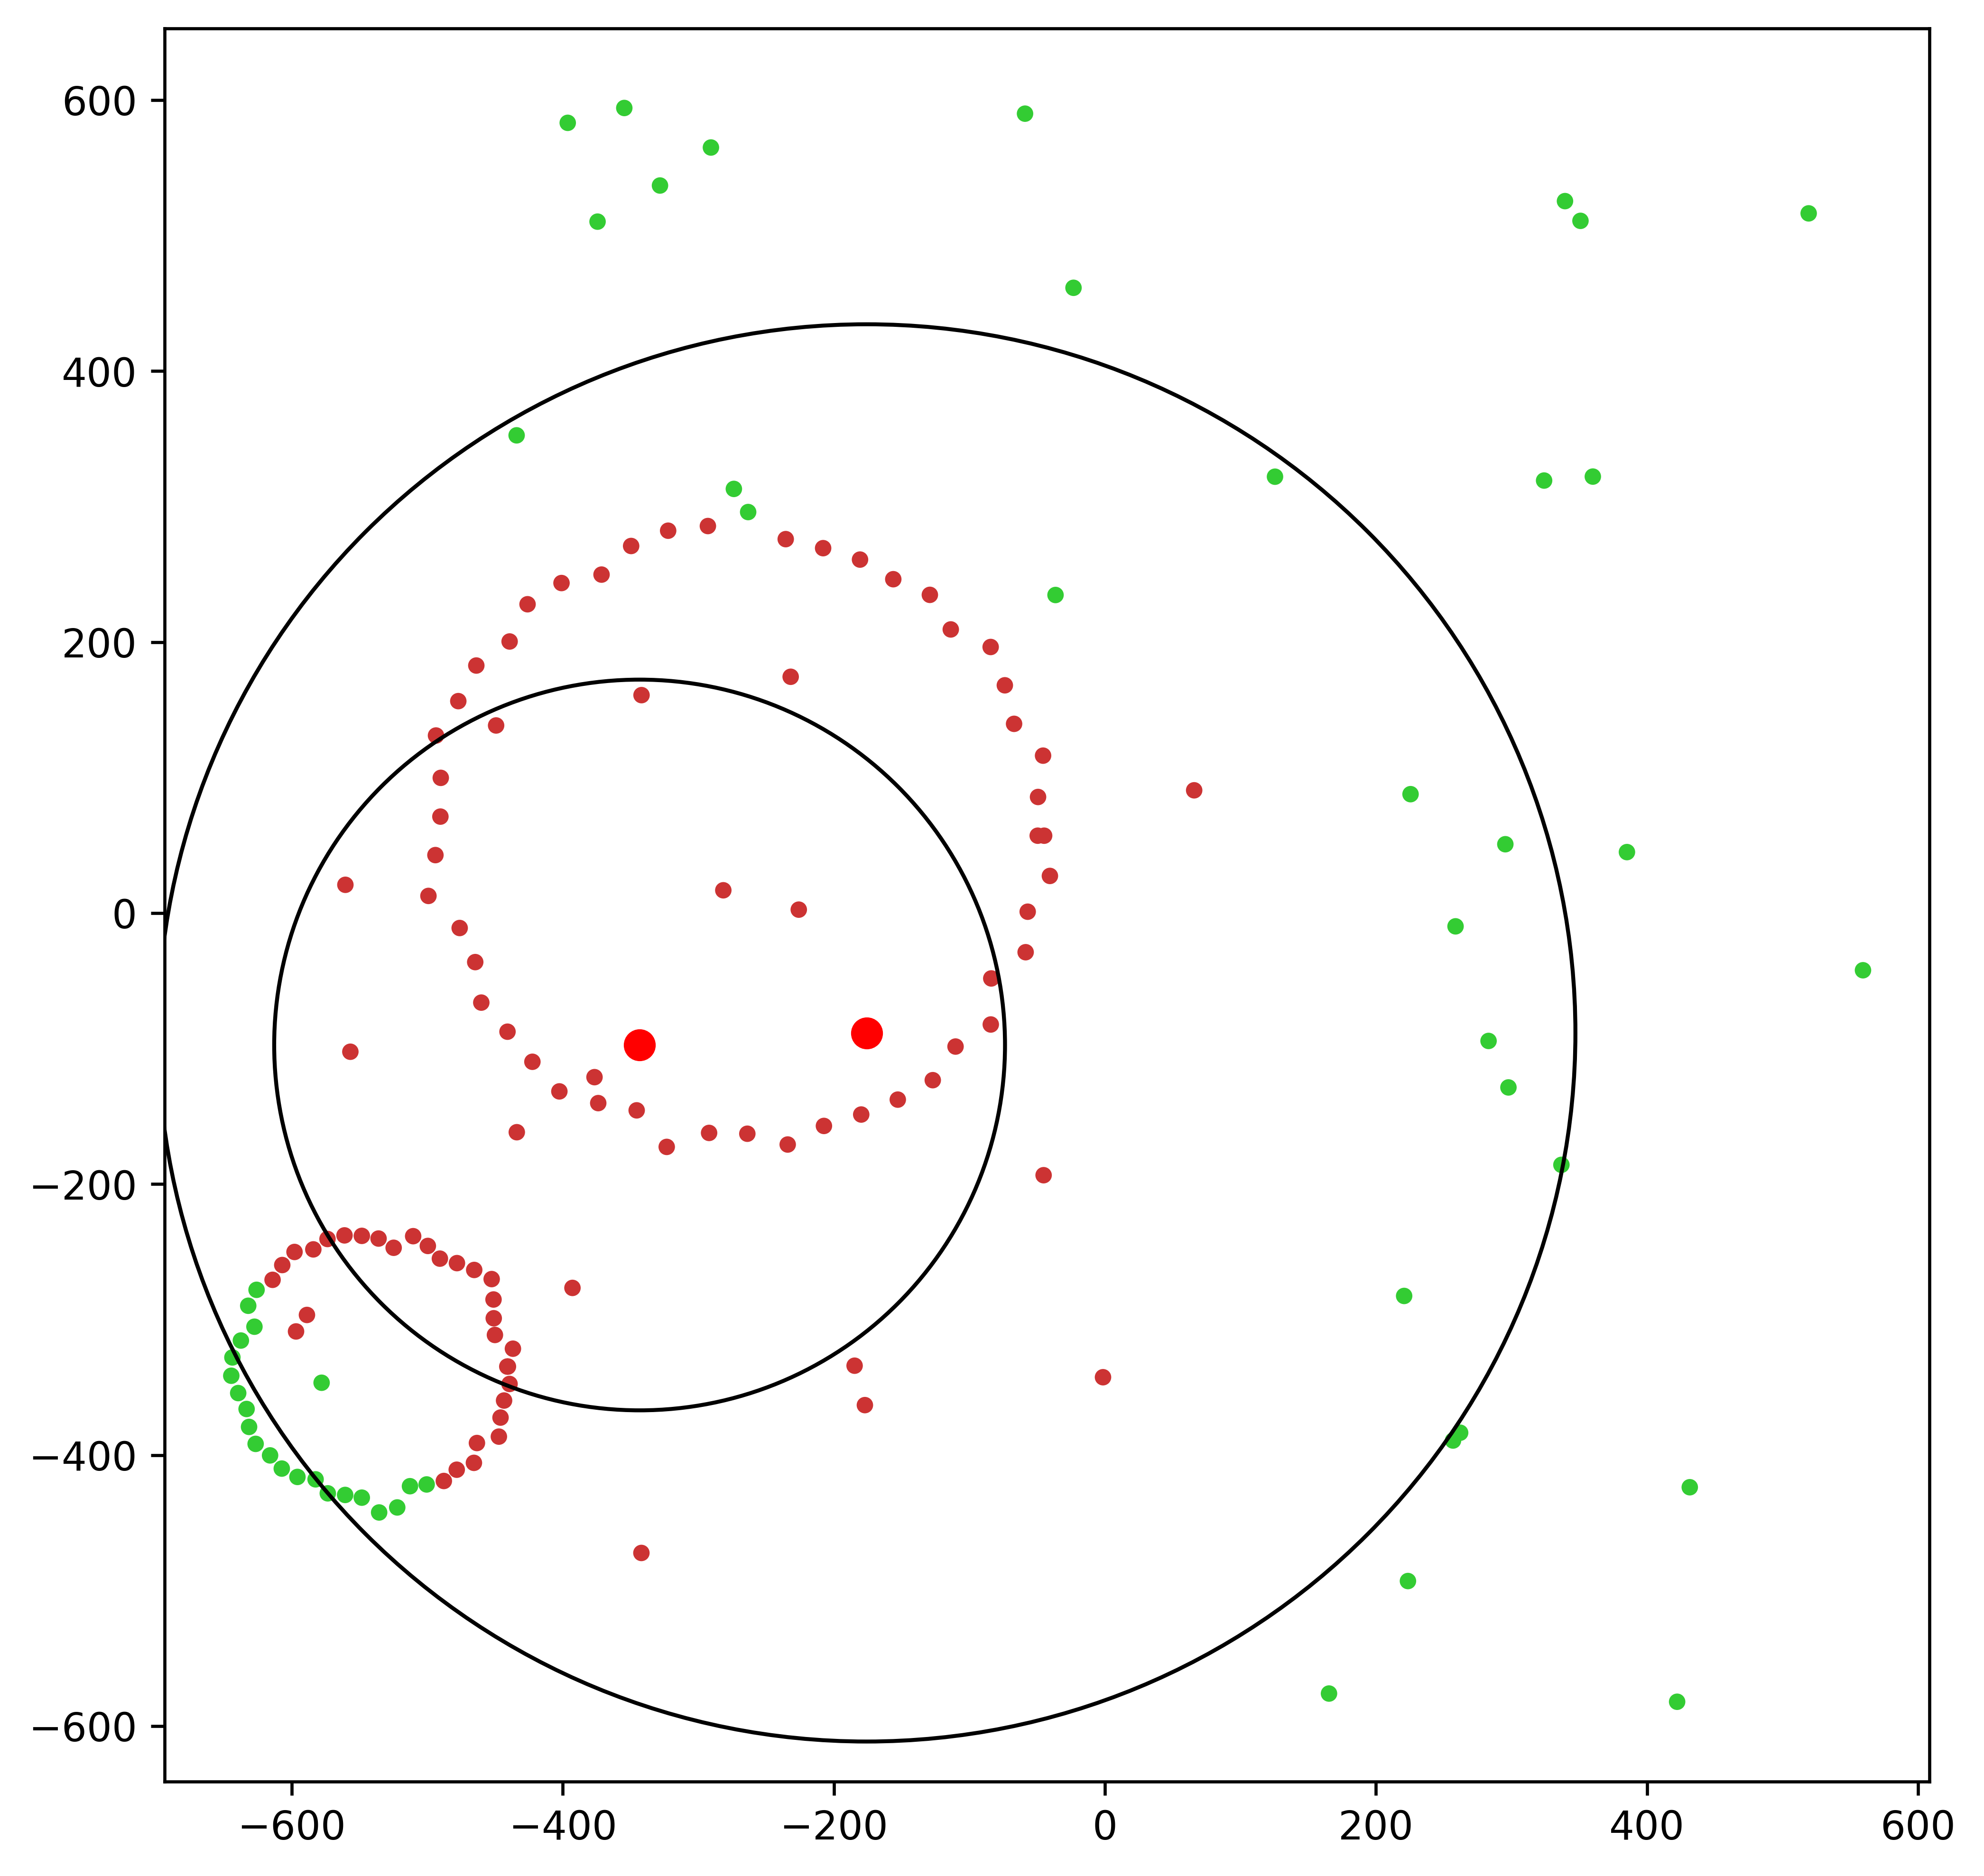

In [43]:
# high res plt
plt.rcParams["figure.dpi"] = 600
# set size
plt.rcParams["figure.figsize"] = (8, 8)
# Assuming random_circles and random_noise are defined functions
# that generate the necessary data

# Generate circles and noise data
EXCENTRIC = np.array([[-600, -600], [-600, 600], [600, -600], [600, 600]])
CONCENTRIC = np.array([[0, 0], [0, 0], [0, 0], [0, 0]])
center_delims = EXCENTRIC
minmax_radius = np.array([50, 400])
n_rings = 2
circles = random_circles(center_delims, minmax_radius, 50, n_rings, noise=5)

# Generate additional noise
noise = random_noise(center_delims, 50, 0.1)

# Combine circles and noise
circles = np.concatenate([circles, noise])


# Fit the clustering model
model = NoisyRingsClustering(
    n_rings=n_rings,
    q=1.7,
    convergence_eps=0,
    max_iters=3300,
    noise_distance_threshold=0.03,
    apply_noise_removal=True,
    datadist="random"
)
model.fit(circles)

# mask = model.prune_noise(threshold=1.5, reestimate_centers_and_radii=False)
# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()

# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError(
        "Not enough distinct vibrant colors for the number of rings")
plot_results(circles, radii, centers, memberships,
             vibrant_colors, show_noise=True)

In [32]:
NAME = "noisy_rings"
save_experiment(model, data=circles, name=NAME)

AttributeError: 'NoisyRingsClustering' object has no attribute 'noise_entropy_threshold'